## 이진 분류

### 데이터 읽어오기

In [1]:
import pandas as pd

# 데이터를 읽어봤더니 각 행을 구분하는 id 속성이 존재
# DataFrame을 만들 때 각 행을 구분하는 컬럼이 있는 경우는 index로 설정하는 것이 좋음
train = pd.read_csv('./data/cfec/train.csv', index_col = 'id')
test = pd.read_csv('./data/cfec/test.csv', index_col = 'id')
submission = pd.read_csv('./data/cfec/submission.csv', index_col = 'id')

# train 데이터의 열이 test 데이터의 열보다 1개가 많음
print(train.head())
print(test.head())
print(submission.head())

    bin_0  bin_1  bin_2 bin_3 bin_4  nom_0      nom_1    nom_2    nom_3  \
id                                                                        
0       0      0      0     T     Y  Green   Triangle    Snake  Finland   
1       0      1      0     T     Y  Green  Trapezoid  Hamster   Russia   
2       0      0      0     F     Y   Blue  Trapezoid     Lion   Russia   
3       0      1      0     F     Y    Red  Trapezoid    Snake   Canada   
4       0      0      0     F     N    Red  Trapezoid     Lion   Canada   

       nom_4  ...      nom_9 ord_0        ord_1        ord_2 ord_3  ord_4  \
id            ...                                                           
0    Bassoon  ...  2f4cb3d51     2  Grandmaster         Cold     h      D   
1      Piano  ...  f83c56c21     1  Grandmaster          Hot     a      A   
2   Theremin  ...  ae6800dd0     1       Expert     Lava Hot     h      R   
3       Oboe  ...  8270f0d71     1  Grandmaster  Boiling Hot     i      D   
4       Oboe

## 데이터의 탐색적 분석

## 피처를 확인

In [2]:
# : 결측치, 이상치 확인
# 범주형에서 중요한 정보는 결측값의 개수, 고유한 값의 개수 등
def resumetable(df) :
    print('데이터 프레임 구조 출력 : ', df.shape)
    
    #각 피처의 자료형 출력
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns = {'index' : '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고유값 개수'] = df.nunique().values    
    summary['첫번째 값'] = df.loc[0].values
    summary['두번째 값'] = df.loc[1].values        
    summary['세번째 값'] = df.loc[2].values        
    
    return summary

In [3]:
resumetable(train)

데이터 프레임 구조 출력 :  (300000, 24)


,피처,데이터 타입,결측값 개수,고유값 개수,첫번째 값,두번째 값,세번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


### 타겟의 분포 확인

In [4]:
print(train['target'].value_counts())

target
0    208236
1     91764
Name: count, dtype: int64


In [5]:
# 순서형 범주형의 고유값 확인
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_0 고윳값: [2 1 3]
ord_1 고윳값: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [6]:
# 순서형 범주형의 고유값 확인
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_3 고윳값: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb' '

In [7]:
# day와 month의 고유값 확인
print('day의 고유값:', train['day'].unique())
print('month의 고유값:', train['month'].unique())

day의 고유값: [2 7 5 4 3 1 6]
month의 고유값: [ 2  8  1  4 10  3  7  9 12 11  5  6]


In [8]:
# 시각화 패키지
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', size = 15)
plt.figure(figsize = (7, 6))

<Figure size 700x600 with 0 Axes>

<Figure size 700x600 with 0 Axes>

[Text(0.5, 1.0, 'Target Distribution')]

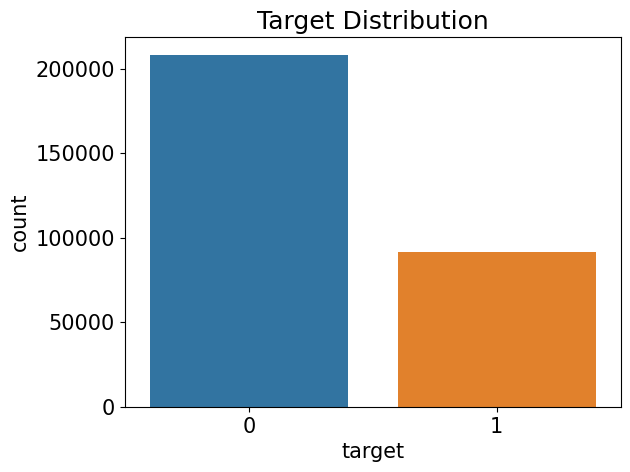

In [9]:
# 타겟 시각화
ax = sns.countplot(x = 'target', data = train)
ax.set(title = "Target Distribution")

<Axes: xlabel='bin_0', ylabel='count'>

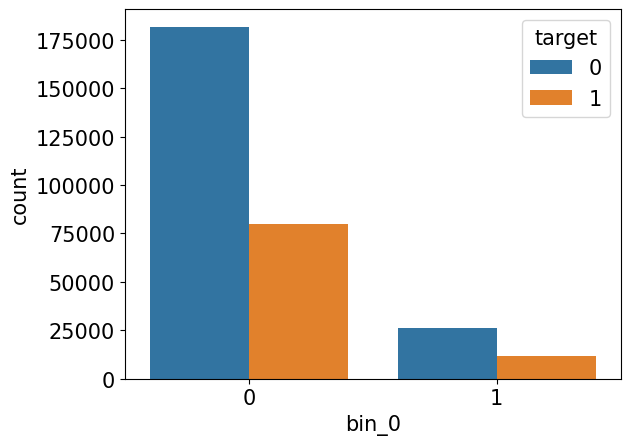

In [10]:
# 이진 피처(bin_0 ~ bin_4)와 타겟의 분포를 확인
sns.countplot(x = 'bin_0', hue = 'target', data = train)

<Axes: xlabel='bin_1', ylabel='count'>

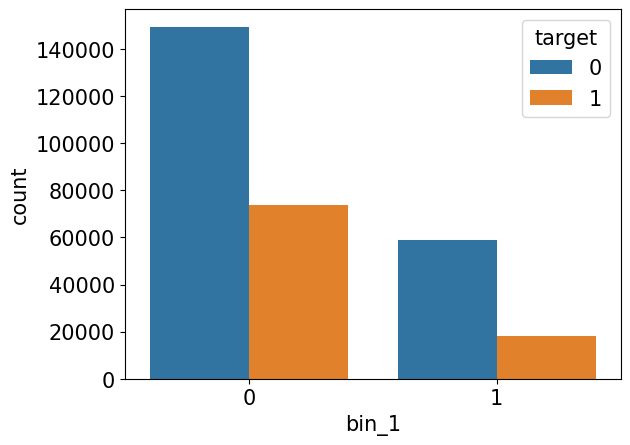

In [11]:
# 이진 피처(bin_0 ~ bin_4)와 타겟의 분포를 확인
sns.countplot(x = 'bin_1', hue = 'target', data = train)

<Axes: xlabel='bin_2', ylabel='count'>

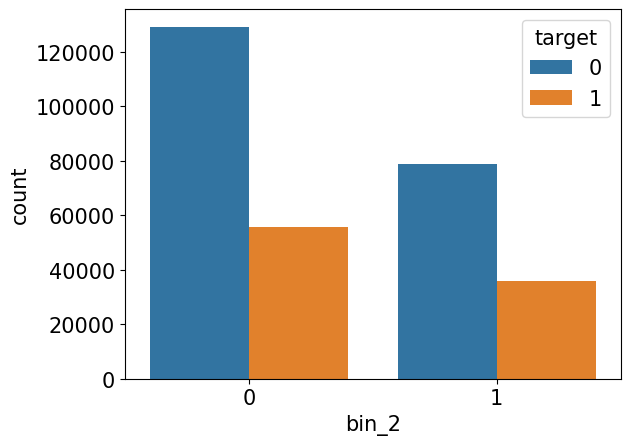

In [12]:
# 이진 피처(bin_0 ~ bin_4)와 타겟의 분포를 확인
sns.countplot(x = 'bin_2', hue = 'target', data = train)

<Axes: xlabel='bin_3', ylabel='count'>

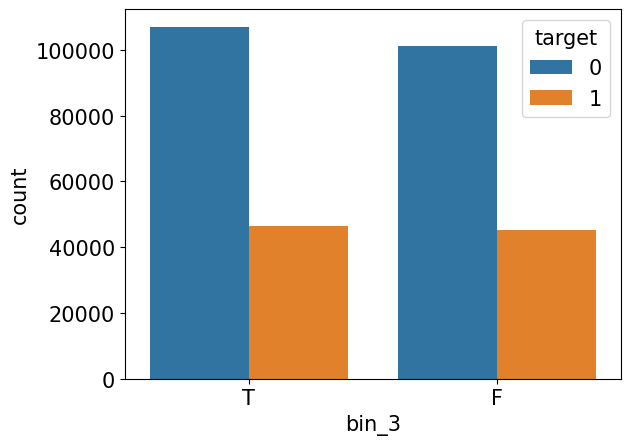

In [13]:
# 이진 피처(bin_0 ~ bin_4)와 타겟의 분포를 확인
sns.countplot(x = 'bin_3', hue = 'target', data = train)

<Axes: xlabel='bin_4', ylabel='count'>

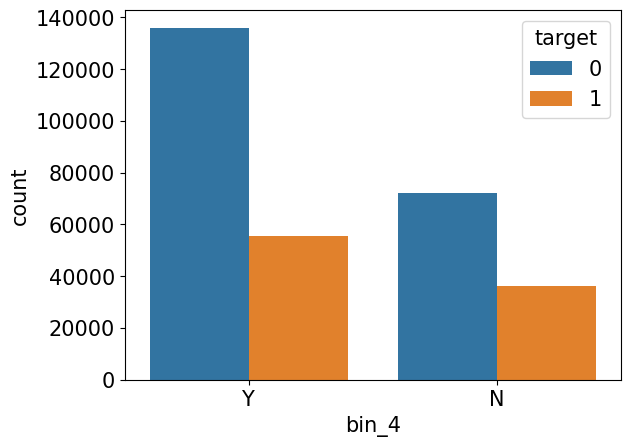

In [14]:
# 이진 피처(bin_0 ~ bin_4)와 타겟의 분포를 확인
sns.countplot(x = 'bin_4', hue = 'target', data = train)

<Axes: xlabel='nom_0', ylabel='count'>

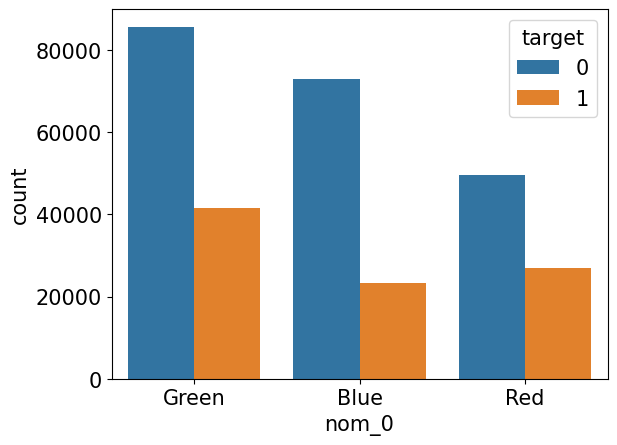

In [15]:
# 명목형 피처(nom_0 ~ 4)와 타겟의 분포를 확인
sns.countplot(x = 'nom_0', hue = 'target', data = train)

<Axes: xlabel='nom_1', ylabel='count'>

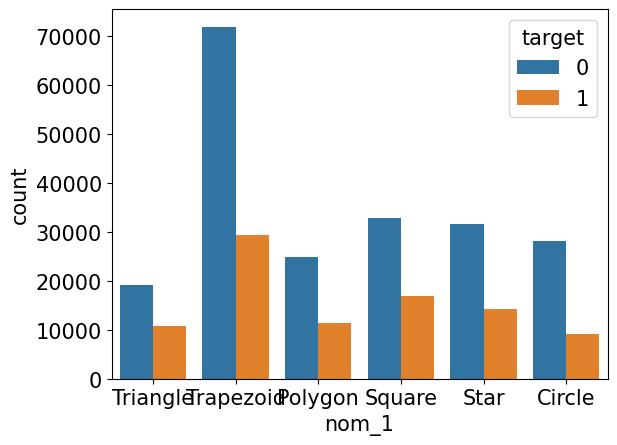

In [16]:
# 명목형 피처(nom_0 ~ 4)와 타겟의 분포를 확인
sns.countplot(x = 'nom_1', hue = 'target', data = train)

<Axes: xlabel='nom_2', ylabel='count'>

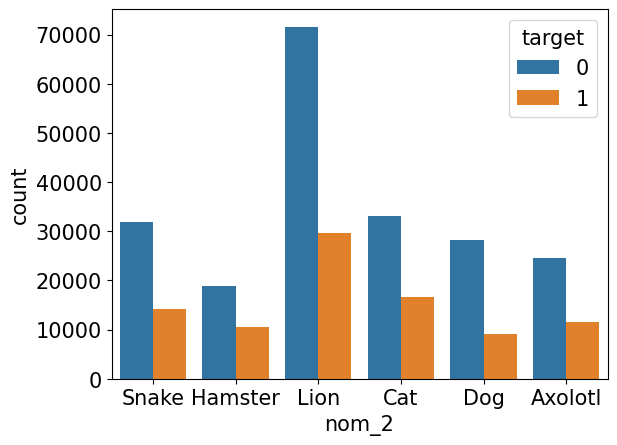

In [17]:
# 명목형 피처(nom_0 ~ 4)와 타겟의 분포를 확인
sns.countplot(x = 'nom_2', hue = 'target', data = train)

<Axes: xlabel='nom_3', ylabel='count'>

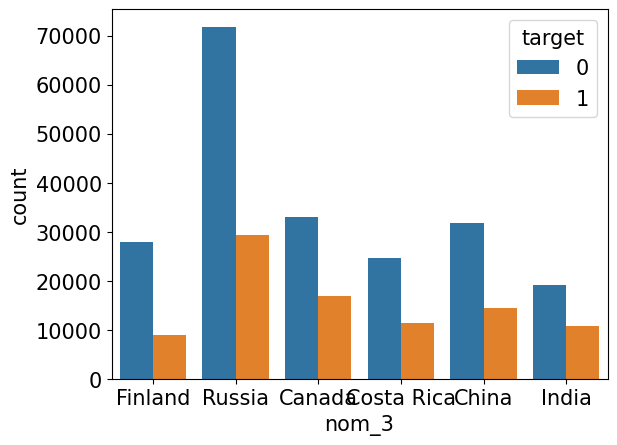

In [18]:
# 명목형 피처(nom_0 ~ 4)와 타겟의 분포를 확인
sns.countplot(x = 'nom_3', hue = 'target', data = train)

<Axes: xlabel='nom_4', ylabel='count'>

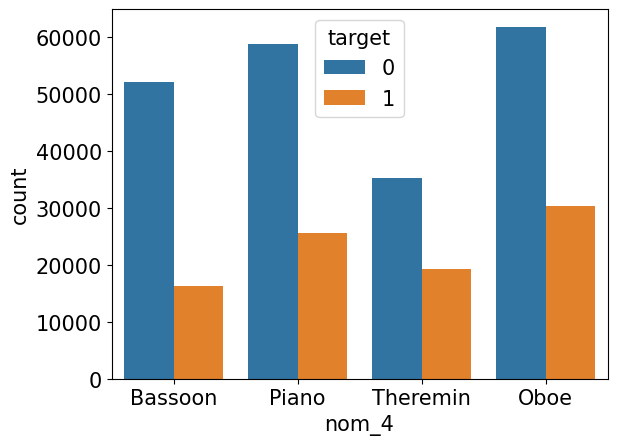

In [19]:
# 명목형 피처(nom_0 ~ 4)와 타겟의 분포를 확인
sns.countplot(x = 'nom_4', hue = 'target', data = train)

<Axes: xlabel='ord_0', ylabel='count'>

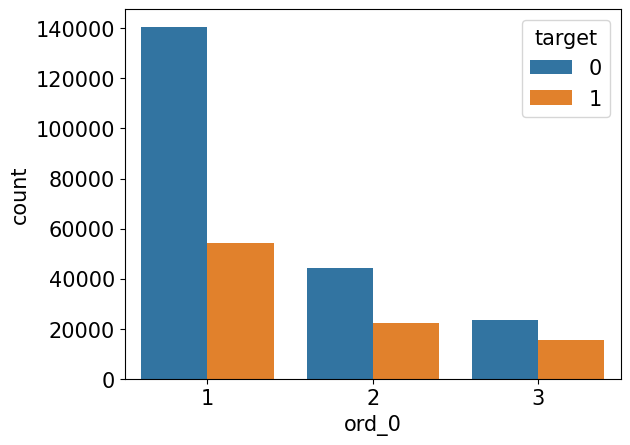

In [20]:
# 순서형 피처와 타겟의 분포 확인
sns.countplot(x = 'ord_0', hue = 'target', data = train)

<Axes: xlabel='ord_1', ylabel='count'>

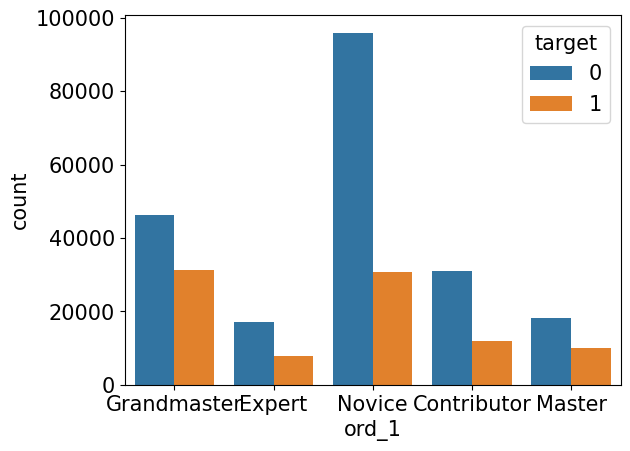

In [21]:
# 순서형 피처와 타겟의 분포 확인
sns.countplot(x = 'ord_1', hue = 'target', data = train)

<Axes: xlabel='ord_2', ylabel='count'>

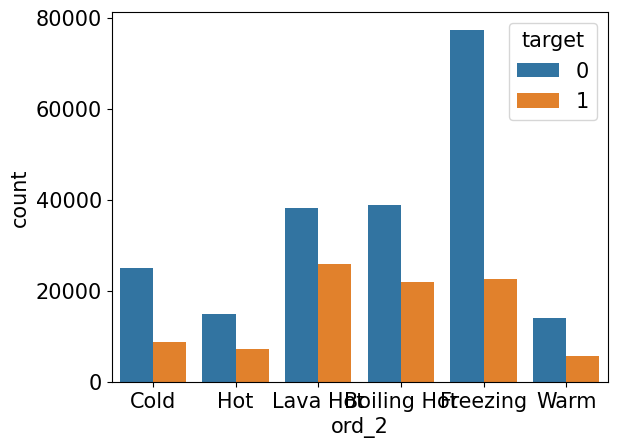

In [22]:
# 순서형 피처와 타겟의 분포 확인
sns.countplot(x = 'ord_2', hue = 'target', data = train)

<Axes: xlabel='ord_3', ylabel='count'>

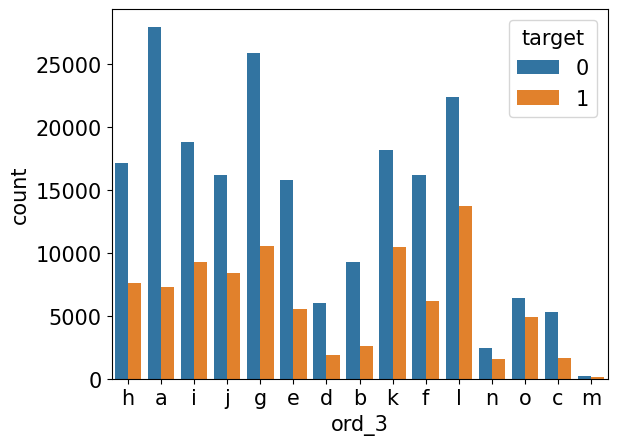

In [23]:
# 순서형 피처와 타겟의 분포 확인
sns.countplot(x = 'ord_3', hue = 'target', data = train)

In [24]:
# 순서가 의미를 갖는 범주형 데이터의 순서 설정
from pandas.api.types import CategoricalDtype

# 범주형 데이터의 순서 설정
ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 범주형 데이터를 하나의 데이터 타입으로 생성
ord_1_dtype = CategoricalDtype(categories = ord_1_value, ordered = True)
ord_2_dtype = CategoricalDtype(categories = ord_2_value, ordered = True)

# 반영
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

In [25]:
# 탐색 결과


## 기본 모델을 이용한 분류

### 데이터 가져오기

In [26]:
train = pd.read_csv('./data/cfec/train.csv', index_col = 'id')
test = pd.read_csv('./data/cfec/test.csv', index_col = 'id')
submission = pd.read_csv('./data/cfec/submission.csv', index_col = 'id')

### 데이터 전처리

In [27]:
# 훈련 데이터와 테스트 데이터를 합쳐서 동일한 구조 만들기
all_data = pd.concat([train, test])
all_data = all_data.drop(['target'], axis = 1)
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


In [28]:
# 피처 원 핫 인코딩
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
all_data_encoded = encoder.fit_transform(all_data)
all_data_encoded

<500000x16552 sparse matrix of type '<class 'numpy.float64'>'
	with 11500000 stored elements in Compressed Sparse Row format>

### 훈련 데이터와 테스트 데이터 생성

In [29]:
num_train = len(train)

X_train = all_data_encoded[:num_train]
# 답안 생성을 위한 데이터 - 새로운 데이터
X_test = all_data_encoded[num_train:]

y = train['target']

# 타겟의 비율에 따라 층화 추출
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size = 0.3,
                                                    stratify = y, random_state = 42)

### 회귀 모델을 만들어서 훈련하고 ROC AUC 점수 출력

In [30]:
from sklearn.linear_model import LogisticRegression

# 로지스틱 회귀를 이용해서 훈련
logistic_model = LogisticRegression(max_iter = 1000, random_state = 42)
logistic_model.fit(X_train, y_train)

# ROC AUC 점수 출력
y_valid_preds = logistic_model.predict_proba(X_valid)[:, 1]

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_valid, y_valid_preds)
print("ROC AUC:", roc_auc)

ROC AUC: 0.7938509352316372


### 답안 생성

In [31]:
y_preds = logistic_model.predict_proba(X_test)[:, 1]
submission['target'] = y_preds
submission.to_csv("submission.csv")

## 피처 엔지니어링과 하이퍼 파라미터 튜닝

### 피처 수정

In [32]:
# 이진 피처 중 값이 0과 1이 아닌 피처의 값을 0과 1로 수정
all_data['bin_3'] = all_data['bin_3'].map({'F': 0, 'T': 1})
all_data['bin_4'] = all_data['bin_4'].map({'N': 0, 'Y': 1})

In [33]:
# 순서형 피처 데이터 변경
ord1dict = {'Novice':0, 'Contributor':1, 'Expert':2, 'Master':3, 'GrandMaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2, 'Hot':3,
            'Boiling Hot':4, 'Lava Hot':5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

In [34]:
# 순서형 피처의 인코딩
from sklearn.preprocessing import OrdinalEncoder

ord_345 = ['ord_3', 'ord_4', 'ord_5']

ord_encoder = OrdinalEncoder()
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

In [35]:
# 명목형 목록은 이전처럼 원 핫 인코딩
nom_features = ['nom_' + str(i) for i in range(10)]

onehot_encoder = OneHotEncoder()
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

# 명목형 피처는 제거
all_data = all_data.drop(nom_features, axis = 1)

In [36]:
# day와 month를 원핫 인코딩하고 피처 삭제
date_features = ['day', 'month']

onehot_encoder = OneHotEncoder()
encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])
all_data = all_data.drop(date_features, axis = 1)

In [37]:
all_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5
id,,,,,,,,,,,
0,0,0,0,1,1,2,NaN,1,7.0,3.0,136.0
1,0,1,0,1,1,1,NaN,3,0.0,0.0,93.0
2,0,0,0,0,1,1,2.0,5,7.0,17.0,31.0
3,0,1,0,0,1,1,NaN,4,8.0,3.0,134.0
4,0,0,0,0,0,1,NaN,0,0.0,17.0,158.0


In [38]:
# 순서형 피처의 값이 0 - 1 가 아니므로 스케일링 수행
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_' + str(i) for i in range(6)]
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

In [39]:
# 명목형 피처와 날짜 피처 합치기
from scipy import sparse

# 원핫 인코딩한 결과가 sparse matrix라서 희소 행렬을 합치는 API를 사용
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data),
                                                encoded_nom_matrix,
                                                encoded_date_matrix], format = 'csr')


### 데이터 분할

In [40]:
# 훈련 데이터의 개수
num_train = len(train)

# 훈련에 사용될 데이터
X_train = all_data_sprs[:num_train]

# 답안 제출에 사용될 데이터
X_test = all_data_sprs[num_train:]

# 훈련에 사용될 데이터
y = train['target']

# ROC AUC 점수를 확인하기 위해서 훈련 데이터를 다시 모델을 훈련시킬 때 사용할 데이터와
# 평가를 할 때 사용할 데이터로 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                     test_size = 0.3,
                                                     stratify = y,
                                                     random_state = 42)
print(X_train.shape)
print(y_train.shape)
X_

(210000, 16306)
(210000,)


NameError: name 'X_' is not defined

### 하이퍼 파리미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

logistic_model = LogisticRegression()

lr_params = {'C':[0.1, 0.125, 0.2], 'max_iter':[800, 900, 1000],
            'random_state':[42]}
gridsearch_logistic_model = GridSearchCV(estimator = logistic_model,
                                        param_grid = lr_params,
                                        scoring = 'roc_auc',
                                        cv = 5)
gridsearch_logistic_model.fit(X_train, y_train)

In [ ]:
# ROC_AUC 점수 출력
y_valid_preds = gridsearch_logistic_model.predict(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_valid_preds)
print(roc_auc)